In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
%matplotlib inline

from matplotlib import rcParams
import seaborn as sns
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10,7

In [3]:
music = pd.DataFrame()

# some data to play with
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102] 

music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 
                 1, 1, 1, 1, 0, 0, 1, 1, 0, 0]



In [4]:
music

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1
5,197,9,1
6,294,29,0
7,382,22,1
8,102,10,1
9,264,24,0


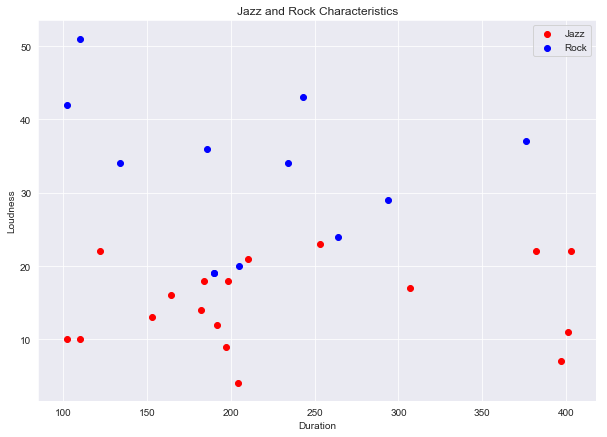

In [13]:
# look at our data
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)

plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)

plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music['jazz']
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long
neighbors.predict([[24, 190]])

array([0], dtype=int64)

In [15]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz

neighbors.fit(X,Y)

## Predict for a 24 loudness and 190 second duration
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


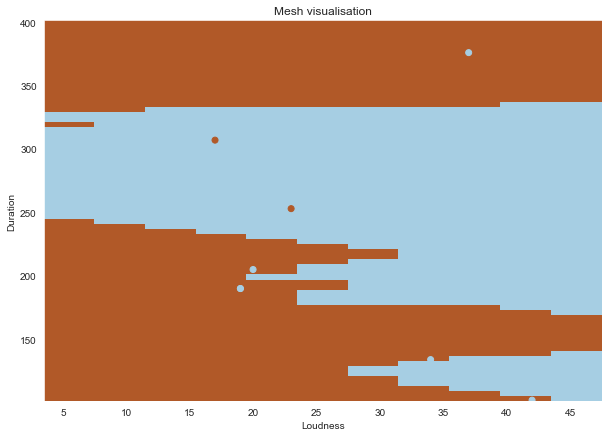

In [16]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size
h = 4.0

# Plot the decision boundry. We assign a color to each point in the mesh
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualisation')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

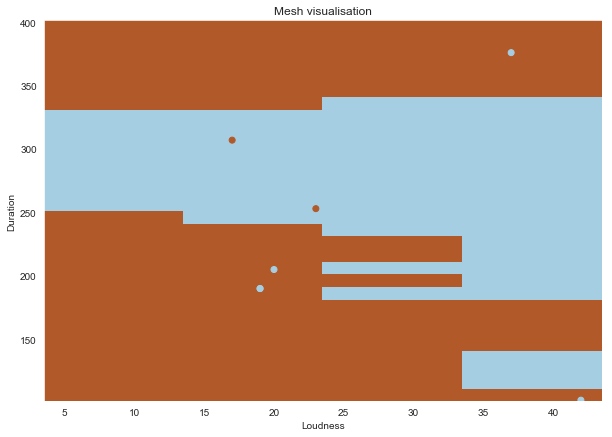

In [17]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size
h = 10.0

# Plot the decision boundry. We assign a color to each point in the mesh
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualisation')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Mesh size: 10


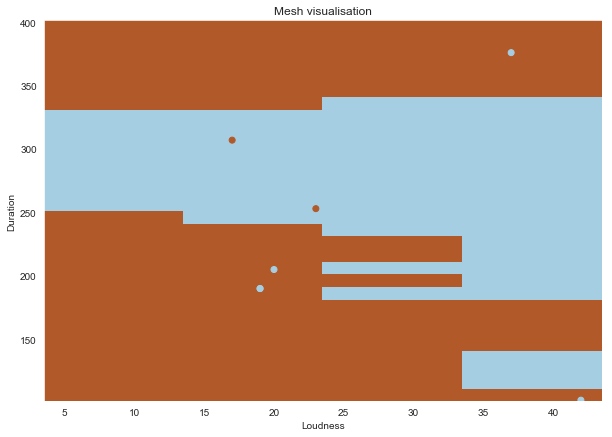


Mesh size: 9


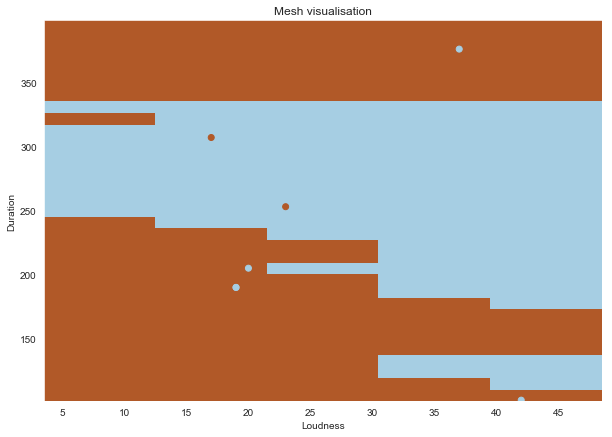


Mesh size: 8


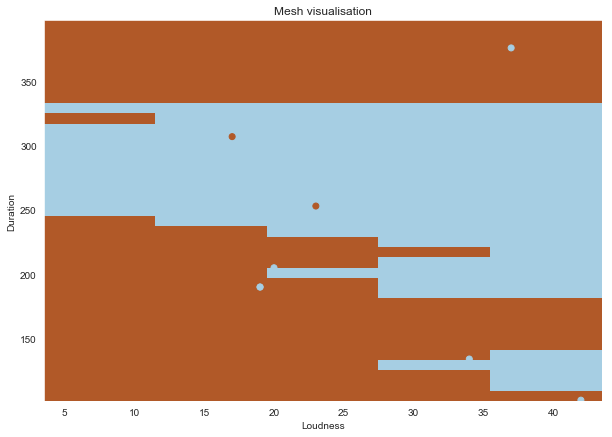


Mesh size: 7


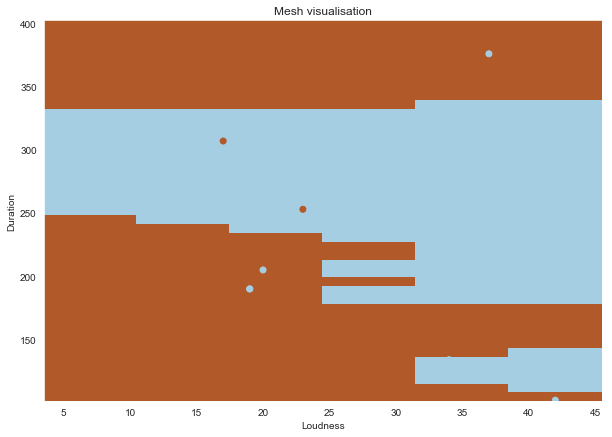


Mesh size: 6


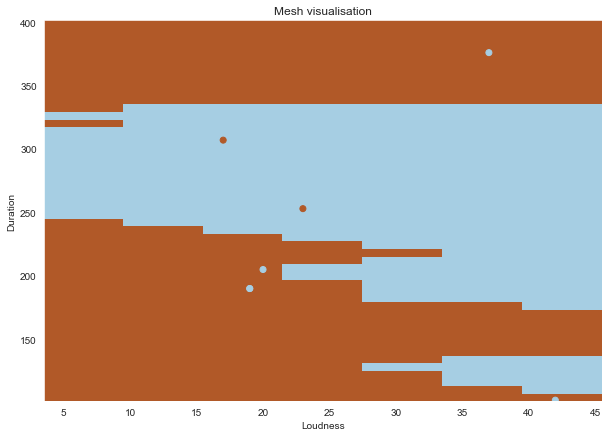


Mesh size: 5


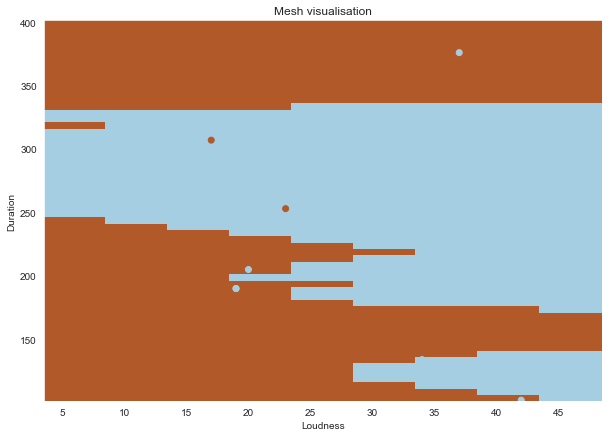


Mesh size: 4


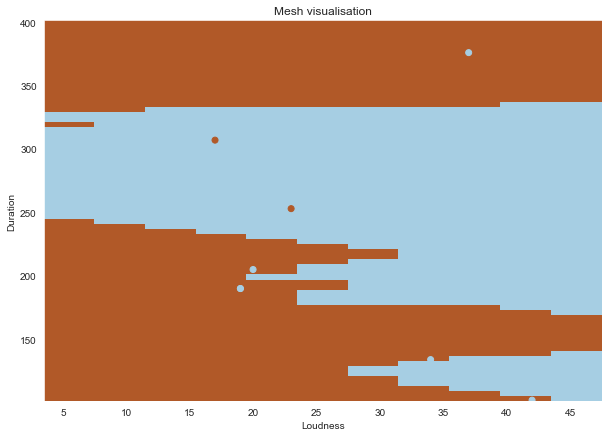


Mesh size: 3


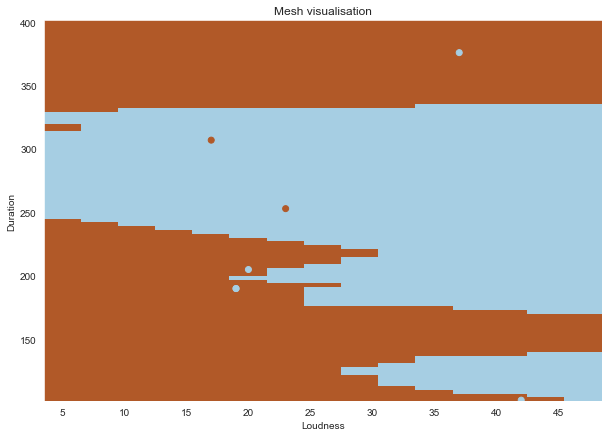


Mesh size: 2


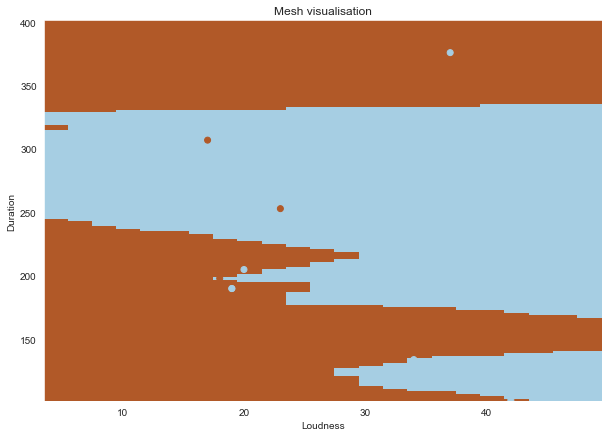


Mesh size: 1


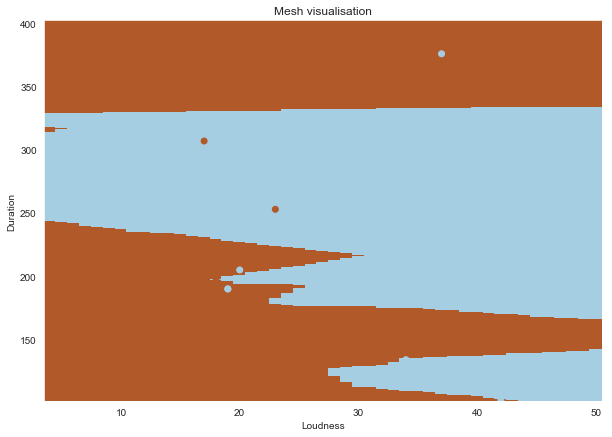

In [18]:
for i in range(10, 0, -1):
    print('Mesh size:', i)
    # Our data. Converting from data frames to arrays for the mesh.
    X = np.array(X)
    Y = np.array(Y)

    # Mesh size
    h = i

    # Plot the decision boundry. We assign a color to each point in the mesh
    x_min = X[:, 0].min() - .5
    x_max = X[:, 0].max() + .5
    y_min = X[:, 1].min() - .5
    y_max = X[:, 1].max() + .5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.set_cmap(plt.cm.Paired)
    plt.pcolormesh(xx, yy, Z)

    # Add the training points to the plot
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.xlabel('Loudness')
    plt.ylabel('Duration')
    plt.title('Mesh visualisation')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()
    print()

In [20]:
music

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1
5,197,9,1
6,294,29,0
7,382,22,1
8,102,10,1
9,264,24,0


In [21]:
import math
d = math.sqrt(2)

len(music)

30

In [36]:
np.array((music.iloc[1]))

array([134,  34,   0], dtype=int64)

In [40]:
music_copy = music.drop('jazz', axis=1)

In [41]:
music_copy

,duration,loudness
0,184,18
1,134,34
2,243,43
3,186,36
4,122,22
5,197,9
6,294,29
7,382,22
8,102,10
9,264,24


In [64]:


unknown_dur = 190
unknown_loud = 24
distance = 0

x = unknown_dur - music_copy.iloc[1]['duration']
y = unknown_loud - music_copy.iloc[1]['loudness']
print(x)
print(y)
math.sqrt((x)**2 + (y)**2)



56
-10


-12

In [83]:
min_dist = 1000
index = 0

for i in range(len(music)):   
    print('index:', i)
    x = unknown_dur - music_copy.iloc[i]['duration']
    y = unknown_loud - music_copy.iloc[i]['loudness']
    print(x, y)
    dist = math.sqrt((x)**2 + (y)**2)
    print('current distance:', dist)
    if dist < min_dist:
        min_dist = dist
        index = i
    print('closest distance:', min_dist)
    print()

index: 0
6 6
current distance: 8.48528137423857
closest distance: 8.48528137423857

index: 1
56 -10
current distance: 56.88585061331157
closest distance: 8.48528137423857

index: 2
-53 -19
current distance: 56.302753041036986
closest distance: 8.48528137423857

index: 3
4 -12
current distance: 12.649110640673518
closest distance: 8.48528137423857

index: 4
68 2
current distance: 68.0294054067798
closest distance: 8.48528137423857

index: 5
-7 15
current distance: 16.55294535724685
closest distance: 8.48528137423857

index: 6
-104 -5
current distance: 104.12012293500234
closest distance: 8.48528137423857

index: 7
-192 2
current distance: 192.01041638411183
closest distance: 8.48528137423857

index: 8
88 14
current distance: 89.10667763978185
closest distance: 8.48528137423857

index: 9
-74 0
current distance: 74.0
closest distance: 8.48528137423857

index: 10
-15 4
current distance: 15.524174696260024
closest distance: 8.48528137423857

index: 11
80 14
current distance: 81.215762016987

In [72]:
music.iloc[16]['jazz']

0

In [74]:
def knn(loudness, duration):    
    min_dist = 1000
    index = 0

    for i in range(len(music)):   
        print('index:', i)
        x = duration - music_copy.iloc[i]['duration']
        y = loudness - music_copy.iloc[i]['loudness']
        print(x, y)
        dist = math.sqrt((x)**2 + (y)**2)
        print('current distance:', dist)
        if dist < min_dist:
            min_dist = dist
            index = i
        print('closest distance:', min_dist)
        print()
    return music.iloc[index]['jazz']

In [76]:
knn(24, 190)

index: 0
6 6
current distance: 8.48528137423857
closest distance: 8.48528137423857

index: 1
56 -10
current distance: 56.88585061331157
closest distance: 8.48528137423857

index: 2
-53 -19
current distance: 56.302753041036986
closest distance: 8.48528137423857

index: 3
4 -12
current distance: 12.649110640673518
closest distance: 8.48528137423857

index: 4
68 2
current distance: 68.0294054067798
closest distance: 8.48528137423857

index: 5
-7 15
current distance: 16.55294535724685
closest distance: 8.48528137423857

index: 6
-104 -5
current distance: 104.12012293500234
closest distance: 8.48528137423857

index: 7
-192 2
current distance: 192.01041638411183
closest distance: 8.48528137423857

index: 8
88 14
current distance: 89.10667763978185
closest distance: 8.48528137423857

index: 9
-74 0
current distance: 74.0
closest distance: 8.48528137423857

index: 10
-15 4
current distance: 15.524174696260024
closest distance: 8.48528137423857

index: 11
80 14
current distance: 81.215762016987

0

In [91]:
min_dist = 1000
index = 0
new_list = []
k = 3

for i in range(len(music)):   
    print('index:', i)
    x = unknown_dur - music_copy.iloc[i]['duration']
    y = unknown_loud - music_copy.iloc[i]['loudness']
    print(x, y)
    dist = math.sqrt((x)**2 + (y)**2)
    print('current distance:', dist)
    new_list.append(dist)
    print()
music['Euclidean dist'] = new_list
print(sorted(new_list)[:k])

index: 0
6 6
current distance: 8.48528137423857

index: 1
56 -10
current distance: 56.88585061331157

index: 2
-53 -19
current distance: 56.302753041036986

index: 3
4 -12
current distance: 12.649110640673518

index: 4
68 2
current distance: 68.0294054067798

index: 5
-7 15
current distance: 16.55294535724685

index: 6
-104 -5
current distance: 104.12012293500234

index: 7
-192 2
current distance: 192.01041638411183

index: 8
88 14
current distance: 89.10667763978185

index: 9
-74 0
current distance: 74.0

index: 10
-15 4
current distance: 15.524174696260024

index: 11
80 14
current distance: 81.21576201698781

index: 12
-117 7
current distance: 117.2092146548214

index: 13
80 -27
current distance: 84.43340571124678

index: 14
-207 17
current distance: 207.6968945362448

index: 15
37 11
current distance: 38.600518131237564

index: 16
0 5
current distance: 5.0

index: 17
-2 12
current distance: 12.165525060596439

index: 18
-20 3
current distance: 20.223748416156685

index: 19
-213 2
cu

In [92]:
music

,duration,loudness,jazz,Euclidean dist
0,184,18,1,8.485281
1,134,34,0,56.885851
2,243,43,0,56.302753
3,186,36,0,12.649111
4,122,22,1,68.029405
5,197,9,1,16.552945
6,294,29,0,104.120123
7,382,22,1,192.010416
8,102,10,1,89.106678
9,264,24,0,74.000000


In [121]:
music[music['Euclidean dist'] == 5.0]['jazz'].mean()

0.0

In [128]:
def knn(loudness, duration, k):    
    min_dist = 100000
    index = 0
    new_list = []
    final = 0

    for i in range(len(music)):   
        x = unknown_dur - music_copy.iloc[i]['duration']
        y = unknown_loud - music_copy.iloc[i]['loudness']
        dist = math.sqrt((x)**2 + (y)**2)
        new_list.append(dist)
    music['Euclidean dist'] = new_list
    results = sorted(new_list)[:k]
    for n in results:
        final += music[music['Euclidean dist'] == n]['jazz'].mean()
    print(final / len(results))
        
        

In [130]:
knn(24, 190, 5)

0.6
